# 다중 회귀분석
* 아파트 가격 예측
<pre>
y = a*x + b*x**2 + c*x**3  -- 단순회귀분석
y = a1*x1 + a2*x2 + a3*x3 ... --다중 회귀분석
</pre>

## 다중회귀분석 변수 추정

## 다중회귀분석 예

In [1]:
import statsmodels.api as sm
boston = sm.datasets.get_rdataset("Boston", package="MASS")
X = boston.data.iloc[:, :-1]
y = boston.data.iloc[:, -1]

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
from sklearn.linear_model import LinearRegression
model_boston = LinearRegression()
model_boston.fit(x_train, y_train)

LinearRegression()

In [4]:
model_boston.score(x_train, y_train)

0.7248858053605913

In [5]:
model_boston.score(x_test, y_test)

0.7659268799038638

In [6]:
pred = model_boston.predict(x_test)

In [7]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.7659268799038638

In [8]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred) # MSE
mse

19.443512181175887

In [9]:
import math
math.sqrt(mse) # RMSE

4.409479808455401

In [10]:
model_boston.coef_

array([-1.27336735e-01,  6.20131834e-02, -5.97891810e-03,  3.46839566e+00,
       -1.97298877e+01,  3.29749009e+00, -6.64522443e-03, -1.71934312e+00,
        3.43750737e-01, -1.24736834e-02, -9.87563486e-01,  1.00595817e-02,
       -4.97219751e-01])

## 다중회귀분석의 추정 방법

In [11]:
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset("Boston", package="MASS")
boston_df = Boston.data

In [12]:
Boston.data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
import statsmodels.formula.api as smf
formula = "medv~" + "+".join(boston_df.iloc[:,:-1].columns)
model_boston = smf.ols(formula=formula, data=boston_df).fit()
model_boston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          6.72e-135
Time:                        15:59:03   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
model_boston.conf_int()

,0,1
Intercept,26.432226,46.486751
crim,-0.172584,-0.043438
zn,0.019449,0.073392
indus,-0.100268,0.141385
chas,0.993904,4.379563
nox,-25.271634,-10.261589
rm,2.988727,4.631004
age,-0.025262,0.026647
dis,-1.867455,-1.083679
rad,0.175692,0.436407


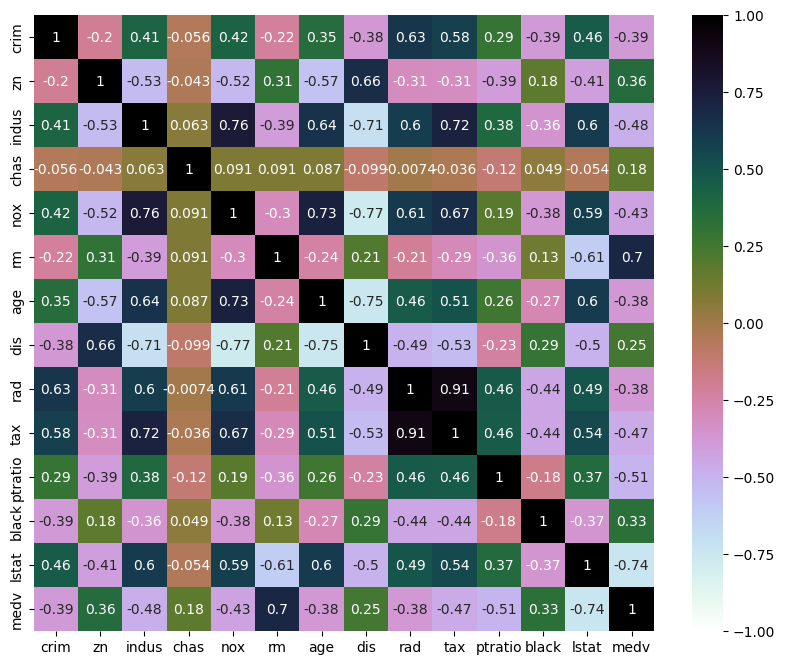

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(boston_df.corr(), vmin=-1, vmax=1, annot=True, cmap="cubehelix_r")
plt.show()

In [17]:
import statsmodels.formula.api as smf
formula = "medv ~ rm + lstat -1"
model_boston = smf.ols(formula=formula, data=boston_df).fit()
model_boston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4637.
Date:                Tue, 04 Jun 2024   Prob (F-statistic):                        0.00
Time:                        15:59:03   Log-Likelihood:                         -1582.9
No. Observations:                 506   AIC:                                      3170.
Df Residuals:                     504   BIC:                                      3178.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rm             4.9069      0.070     69.906      0.000       4.769       5.045
lstat         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 상관계수와 결정계수

## AIC와 BIC

## 잔차의 독립성

## 잔차의 정규성

In [18]:
import statsmodels.formula.api as smf
formula = "medv ~ rad + zn + rm + chas + age -1"
model_boston2 = smf.ols(formula=formula, data=boston_df).fit()

In [19]:
model_boston2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1363.
Date:                Tue, 04 Jun 2024   Prob (F-statistic):                   5.05e-289
Time:                        15:59:03   Log-Likelihood:                         -1654.6
No. Observations:                 506   AIC:                                      3319.
Df Residuals:                     501   BIC:                                      3340.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rad           -0.2183      0.037     -5.924      0.000      -0.291      -0.146
zn             0.0161      0.015      1.056      0.291      -0.014       0.046
rm             4.7232      0.147     32.166      0.000       4.435       5.012
chas           5.6944      1.128      5.047      0.000       3.478       7.911
age           -0.0792      0.012     -6.358      0.000      -0.104      -0.055
==============================================================================
Omnibus:                      234.375   Durbin-Watson:                   0.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.471
Skew:                           2.008   Prob(JB):                    6.49e-273
Kurtosis:                       9.583   Cond. No.                         299.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 다중공선성

In [20]:
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset("Boston", package="MASS")
boston_df = Boston.data

In [21]:
formula = "medv~" + "+".join(boston_df.iloc[:, :-1].columns)

In [22]:
from patsy import dmatrices
y, X = dmatrices(formula, boston_df, return_type="dataframe")

In [23]:
import pandas as pd
vif = pd.DataFrame()

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) 
                    for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by="VIF Factor", ascending=False)

,VIF Factor,features
0,585.265238,Intercept
10,9.008554,tax
9,7.484496,rad
5,4.393720,nox
3,3.991596,indus
8,3.955945,dis
7,3.100826,age
13,2.941491,lstat
2,2.298758,zn
6,1.933744,rm


In [25]:
from patsy import dmatrices
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(formula, df):
    y, X = dmatrices(formula, df, return_type="dataframe")
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) 
                        for i in range(X.shape[1])]
    vif["features"] = X.columns
    vif.sort_values(by="VIF Factor", ascending=False, inplace=True)
    return vif

In [26]:
feature_cols = list(boston_df.columns[:-1])
while True :
    formula = "medv~" + "+".join(feature_cols)+"-1"
    vif = get_vif(formula, boston_df)
    if vif.iloc[0,0] > 10:
        feature_cols.remove(vif.iloc[0,1])
    else :
        break

print(vif)

   VIF Factor features
2    6.900077    indus
6    6.726973    lstat
5    4.678181      rad
4    3.968908      dis
1    2.299351       zn
0    2.067135     crim
3    1.086574     chas
